In [8]:
df1

,Name,ID,Date Received,Date Notified,Days Difference,Count
0,Tom,ABCD,2020-03-19,2020-03-19,0,1
1,Mike,ABCF,2020-03-19,2020-03-20,1,1
2,Jake,ABCD,2020-03-19,2020-03-20,1,1
3,Steve,ABCF,2020-03-20,2020-03-22,2,1
4,Richard,ABCD,2020-03-21,2020-03-23,2,1
5,Terry,ABCF,2020-03-21,2020-03-21,0,1
6,Lisa,ABCD,2020-03-24,2020-03-24,0,1
7,Ann,ABCF,2020-03-25,2020-03-26,1,1
8,Mike,ABCD,2020-03-25,2020-03-27,2,1


In [9]:
test

,Day,Days
0,2020-03-18,0
1,2020-03-19,1
2,2020-03-20,2
3,2020-03-21,3
4,2020-03-22,4
...,...,...
1014,2022-12-27,1014
1015,2022-12-28,1015
1016,2022-12-29,1016
1017,2022-12-30,1017


In [35]:
import pandas as pd
import numpy as np

df1=pd.read_excel('test1.xlsx',sheet_name='Sheet1')
df1['Date Received'] = pd.to_datetime(df1['Date Received']).dt.date
 
df5 = df1.pivot_table(values='Count', columns='Date Received', aggfunc=np.sum).T
 
 
df5['Total'] = 0
df5.fillna(0,inplace=True) 
 
# i=0
# for x in df5.index:
#     if i==0:
#         df5.iloc[i]['Total'] = df5.iloc[i]['Count']
#         i+=1
#     else:
#         if df5.iloc[i]['Count'] == 0:
#             df5.iloc[i]['Total'] = df5.iloc[i-1]['Total']
#             i+=1
#         else:
#             df5.iloc[i]['Total'] = df5.iloc[i]['Count'] + df5.iloc[i-1]['Total']
#             i+=1
 
df5 = df5.cumsum(axis=0)
    
test=pd.read_excel('test1.xlsx',sheet_name='test')
test['Day'] = pd.to_datetime(test['Day']).dt.date
df5 = pd.merge(left=test,right=df5,how='left',left_on='Day',right_on=df5.index)  
df5.fillna(0,inplace=True) 
 
df5.head(10)

,Day,Days,Count,Total
0,2020-03-18,0,0.0,0.0
1,2020-03-19,1,3.0,0.0
2,2020-03-20,2,4.0,0.0
3,2020-03-21,3,6.0,0.0
4,2020-03-22,4,0.0,0.0
5,2020-03-23,5,0.0,0.0
6,2020-03-24,6,7.0,0.0
7,2020-03-25,7,9.0,0.0
8,2020-03-26,8,0.0,0.0
9,2020-03-27,9,0.0,0.0


In [34]:
df6 = df5.cumsum(axis=1)
df6

,Count,Total
Date Received,,
2020-03-19,3,3
2020-03-20,1,1
2020-03-21,2,2
2020-03-24,1,1
2020-03-25,2,2


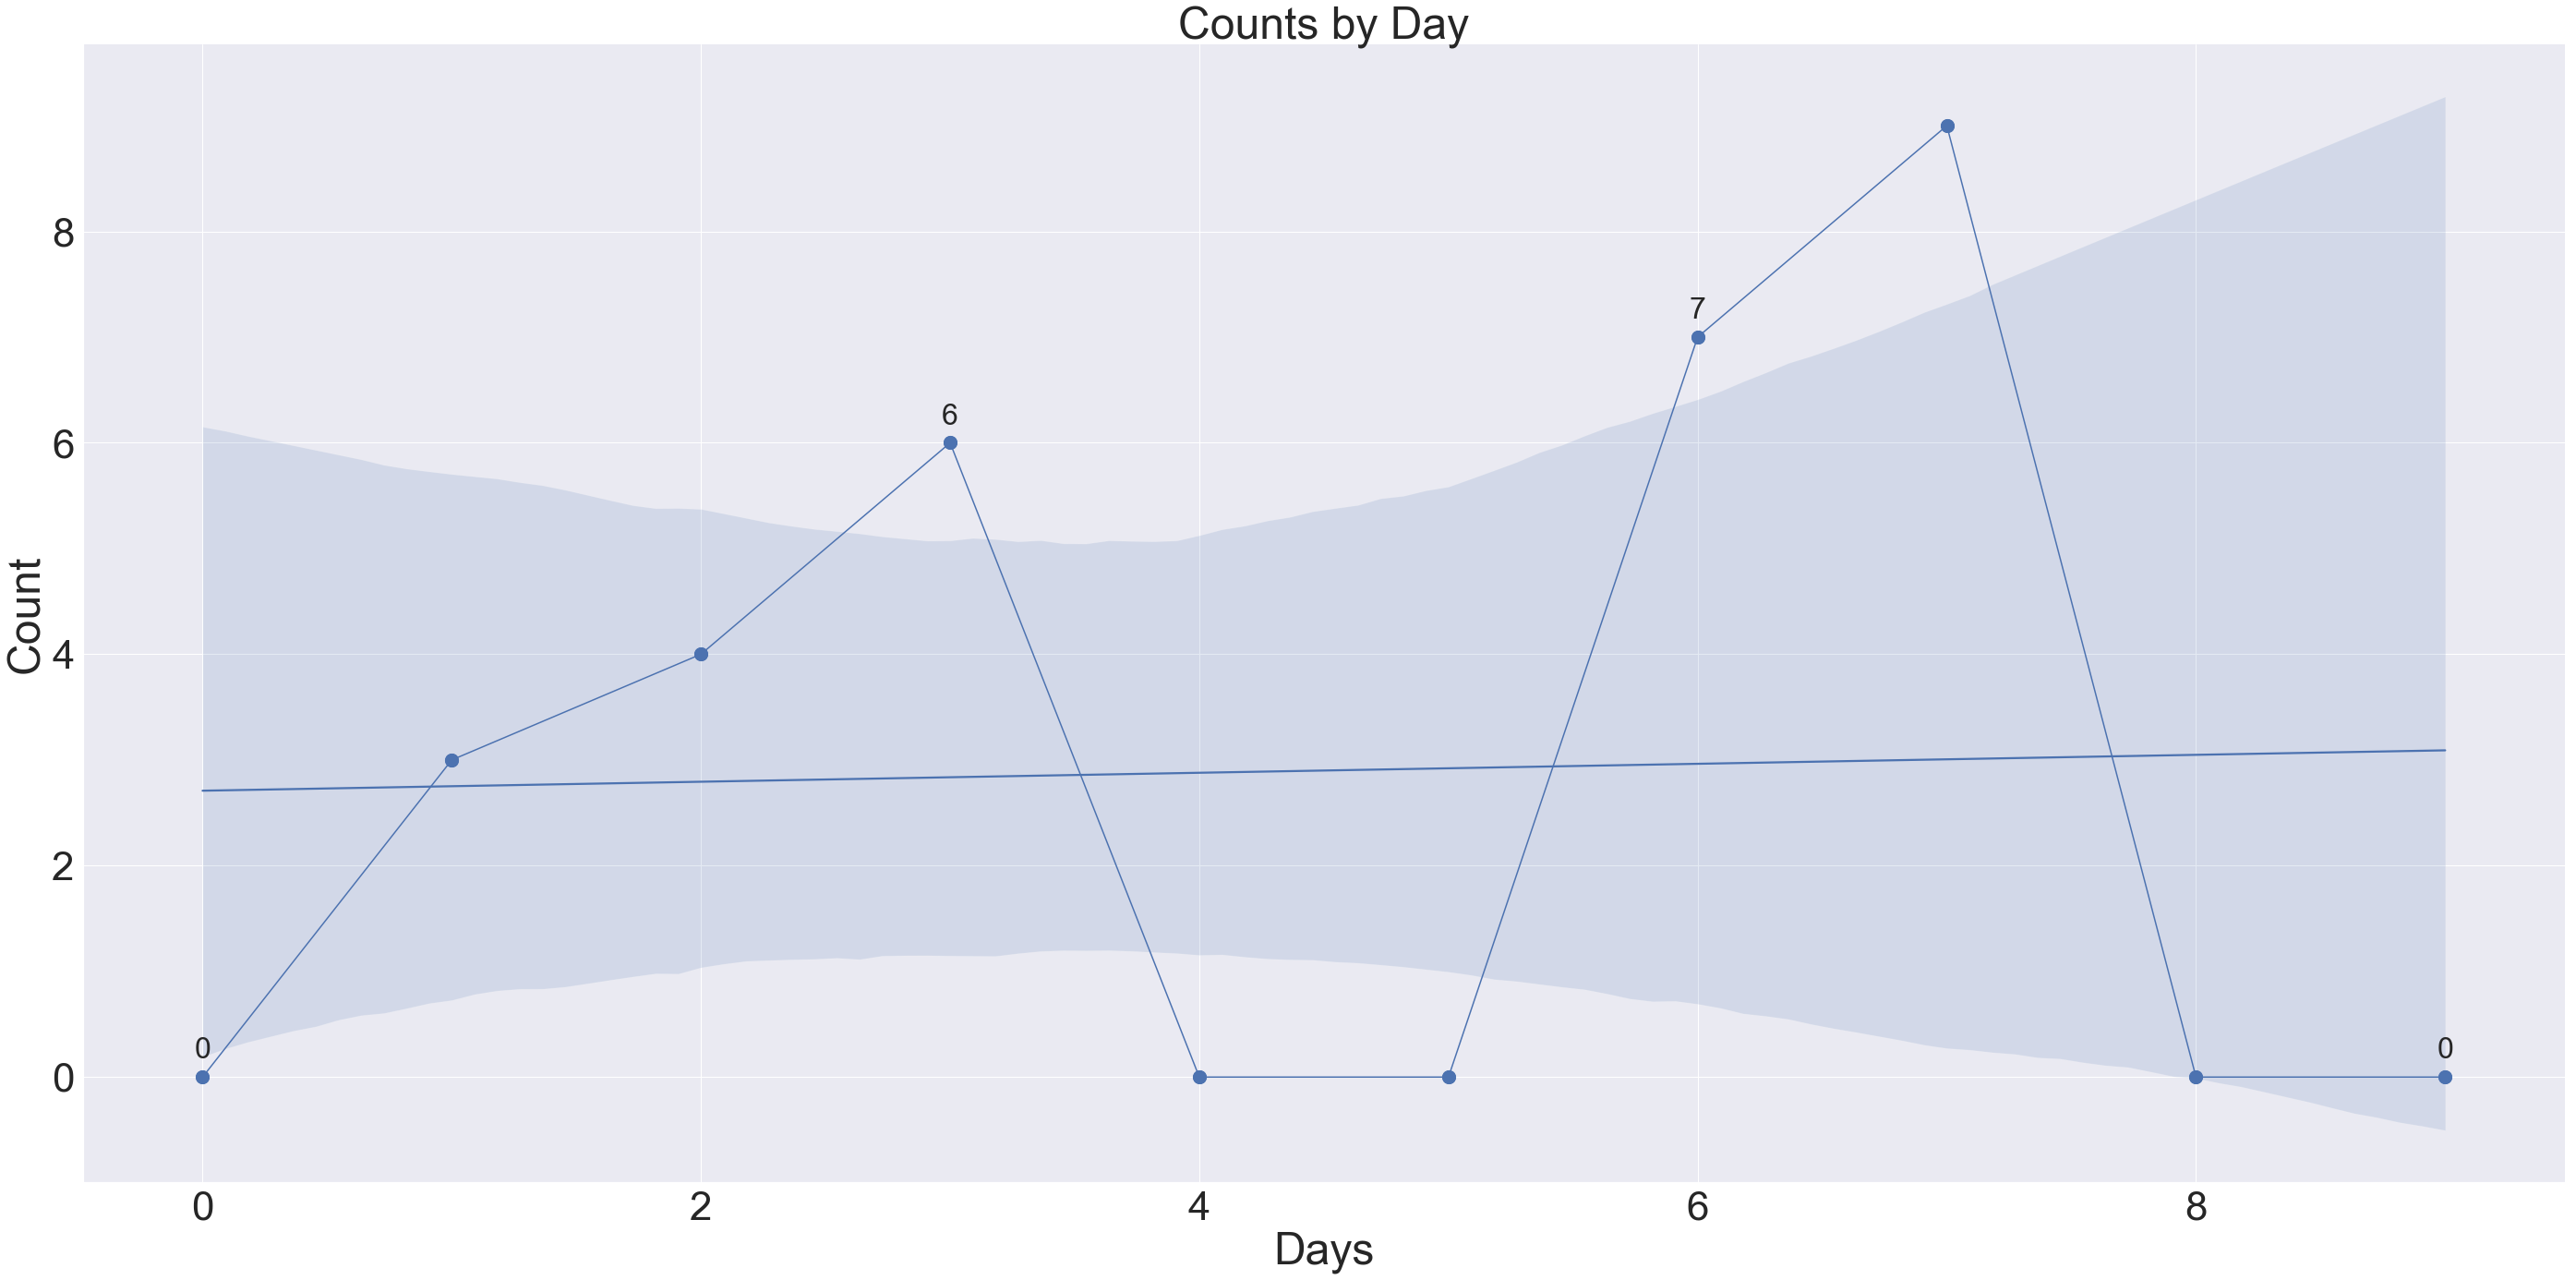

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import win32com.client as win32
from datetime import datetime, timedelta
from matplotlib import font_manager
from statistics import mean
import seaborn as sns
from matplotlib import rcParams


# today = datetime.strftime(datetime.now(), '%Y-%m-%d').dt.date
today = pd.Timestamp("today").strftime("%Y-%m-%d")
df5['Day'] = df5['Day'].astype(str)
 
df5['Days'] = df5['Days'].astype(float)
df5['Count'] = df5['Count'].astype(float)
 
last = df5['Count'].iloc[-1].astype(int)
 
df5 = df5.loc[((df5['Day'] <= '2020-03-27') & (df5['Day'] >= '2020-03-18'))]
 
# figure size in inches
rcParams['figure.figsize'] = 32,20
 
sns.set(font_scale = 4)
 
sns.lmplot(data=df5, x='Days', y='Count',order=1, height=20,
          scatter_kws={'s':200},aspect=2)
 
n=3
 
for x,y in zip(df5['Days'],df5['Count']):
    if x % n == 0:
        label = "{:.0f}".format(y)
        text = plt.annotate(label, # this is the text
        (x,y), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,20), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center
        text.set_fontsize(32)
    else:
        pass
 
 
plt.plot(df5['Days'],df5['Count'], '-o',ms=14)
 
ax = plt.gca()
ax.set_title("Counts by Day")
 
plt.savefig("seaborn_chart.png")